In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install statsmodels
import statsmodels.api as sm

In [ ]:
# read the by dong count aggregation data (left)
df_OD_count = pd.read_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/aggregated_Dong-Dong count_2023_03_ver2.csv')

# read indices_with_Engname data (right)
df_name = pd.read_csv('/content/drive/MyDrive/FMC_Data/ADMI_202303.csv')

In [ ]:
df_OD_count.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,RT-NonWork_CNT,RT-Work_CNT
0,11110515,11110515,13045.84,52744.40,139766.81,126720.97,-73976.57
1,11110515,11110530,11888.65,12368.02,108223.86,96335.21,-83967.19
2,11110515,11110540,1498.43,2483.60,27594.13,26095.70,-23612.10
3,11110515,11110550,1207.86,12662.17,14987.79,13779.93,-1117.76
4,11110515,11110560,1033.45,12025.93,7057.94,6024.49,6001.44


In [ ]:
df_name.head()

,SIDO_NM,SGG_NM,ADMI_NM,ADMI_CD,FULL_NM,BASE_YM
0,서울특별시,종로구,청운효자동,11110515,서울특별시 종로구 청운효자동,202303
1,서울특별시,종로구,사직동,11110530,서울특별시 종로구 사직동,202303
2,서울특별시,종로구,삼청동,11110540,서울특별시 종로구 삼청동,202303
3,서울특별시,종로구,부암동,11110550,서울특별시 종로구 부암동,202303
4,서울특별시,종로구,평창동,11110560,서울특별시 종로구 평창동,202303


In [ ]:
# Combine 'sido' and 'gu' columns with a space in between
df_name['full_gu_name'] = df_name['SIDO_NM'] + ' ' + df_name['SGG_NM']
df_name.head()

,SIDO_NM,SGG_NM,ADMI_NM,ADMI_CD,FULL_NM,BASE_YM,full_gu_name
0,서울특별시,종로구,청운효자동,11110515,서울특별시 종로구 청운효자동,202303,서울특별시 종로구
1,서울특별시,종로구,사직동,11110530,서울특별시 종로구 사직동,202303,서울특별시 종로구
2,서울특별시,종로구,삼청동,11110540,서울특별시 종로구 삼청동,202303,서울특별시 종로구
3,서울특별시,종로구,부암동,11110550,서울특별시 종로구 부암동,202303,서울특별시 종로구
4,서울특별시,종로구,평창동,11110560,서울특별시 종로구 평창동,202303,서울특별시 종로구


In [ ]:
# Merge origin dong's gu name on the df_OD_count
selected_cols_to_merge = ['ADMI_CD', 'full_gu_name', 'SIDO_NM', 'SGG_NM']
merged_df = pd.merge(df_OD_count, df_name[selected_cols_to_merge], left_on = 'O_ADMDONG_CD', right_on = 'ADMI_CD', how = 'left')
merged_df = merged_df.drop(columns=['ADMI_CD'])
columns_to_rename = {col: col + '_orig' for col in selected_cols_to_merge if col != 'ADMI_CD'}
merged_df = merged_df.rename(columns=columns_to_rename)
merged_df.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,RT-NonWork_CNT,RT-Work_CNT,full_gu_name_orig,SIDO_NM_orig,SGG_NM_orig
0,11110515,11110515,13045.84,52744.40,139766.81,126720.97,-73976.57,서울특별시 종로구,서울특별시,종로구
1,11110515,11110530,11888.65,12368.02,108223.86,96335.21,-83967.19,서울특별시 종로구,서울특별시,종로구
2,11110515,11110540,1498.43,2483.60,27594.13,26095.70,-23612.10,서울특별시 종로구,서울특별시,종로구
3,11110515,11110550,1207.86,12662.17,14987.79,13779.93,-1117.76,서울특별시 종로구,서울특별시,종로구
4,11110515,11110560,1033.45,12025.93,7057.94,6024.49,6001.44,서울특별시 종로구,서울특별시,종로구


In [ ]:
# Merge destination dong's gu name on the df_OD_count
merged_df = pd.merge(merged_df, df_name[selected_cols_to_merge], left_on = 'D_ADMDONG_CD', right_on = 'ADMI_CD', how = 'left')
merged_df = merged_df.drop(columns=['ADMI_CD'])
columns_to_rename = {col: col + '_dest' for col in selected_cols_to_merge if col != 'ADMI_CD'}
merged_df = merged_df.rename(columns=columns_to_rename)
merged_df.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,RT-NonWork_CNT,RT-Work_CNT,full_gu_name_orig,SIDO_NM_orig,SGG_NM_orig,full_gu_name_dest,SIDO_NM_dest,SGG_NM_dest
0,11110515,11110515,13045.84,52744.40,139766.81,126720.97,-73976.57,서울특별시 종로구,서울특별시,종로구,서울특별시 종로구,서울특별시,종로구
1,11110515,11110530,11888.65,12368.02,108223.86,96335.21,-83967.19,서울특별시 종로구,서울특별시,종로구,서울특별시 종로구,서울특별시,종로구
2,11110515,11110540,1498.43,2483.60,27594.13,26095.70,-23612.10,서울특별시 종로구,서울특별시,종로구,서울특별시 종로구,서울특별시,종로구
3,11110515,11110550,1207.86,12662.17,14987.79,13779.93,-1117.76,서울특별시 종로구,서울특별시,종로구,서울특별시 종로구,서울특별시,종로구
4,11110515,11110560,1033.45,12025.93,7057.94,6024.49,6001.44,서울특별시 종로구,서울특별시,종로구,서울특별시 종로구,서울특별시,종로구


In [ ]:
# Aggregate

In [ ]:
unique_full_gu_name_orig = merged_df['full_gu_name_orig'].nunique()
unique_full_gu_name_orig

249

In [ ]:
unique_full_gu_name_dest = merged_df['full_gu_name_dest'].nunique()
unique_full_gu_name_dest

249

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204373 entries, 0 to 3204372
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   O_ADMDONG_CD       int64  
 1   D_ADMDONG_CD       int64  
 2   CNT_1              float64
 3   CNT_3              float64
 4   CNT_24567          float64
 5   RT-NonWork_CNT     float64
 6   RT-Work_CNT        float64
 7   full_gu_name_orig  object 
 8   SIDO_NM_orig       object 
 9   SGG_NM_orig        object 
 10  full_gu_name_dest  object 
 11  SIDO_NM_dest       object 
 12  SGG_NM_dest        object 
dtypes: float64(5), int64(2), object(6)
memory usage: 317.8+ MB


In [ ]:
# Filter rows where 'RT-NonWork_CNT' is negative
negative_rt_nonwork_cnt = merged_df[merged_df['RT-NonWork_CNT'] < 0]

# Count the number of such rows
num_negative_rt_nonwork_cnt = negative_rt_nonwork_cnt.shape[0]

print(f"Number of rows with negative 'RT-NonWork_CNT': {num_negative_rt_nonwork_cnt}")

Number of rows with negative 'RT-NonWork_CNT': 0


In [ ]:
# Calculate total non-work trips for each origin
total_origin_trips = merged_df.groupby('full_gu_name_orig')['RT-NonWork_CNT'].sum()

# Calculate total non-work trips where origin = destination
self_trips = merged_df[merged_df['full_gu_name_orig'] == merged_df['full_gu_name_dest']].groupby('full_gu_name_orig')['RT-NonWork_CNT'].sum()

# Calculate self-containment for each area
self_containment = self_trips / total_origin_trips
self_containment = self_containment.fillna(0)  # fill NaN values with 0

# Calculate total non-work trips for each destination, excluding trips where origin = destination
total_dest_trips = merged_df[merged_df['full_gu_name_orig'] != merged_df['full_gu_name_dest']].groupby('full_gu_name_dest')['RT-NonWork_CNT'].sum()

# Calculate total non-work trips for each destination
total_trips = merged_df.groupby('full_gu_name_dest')['RT-NonWork_CNT'].sum()

# Calculate pull-effect for each area
pull_effect = total_dest_trips / (total_trips - total_dest_trips)
pull_effect = pull_effect.fillna(0)  # fill NaN values with 0

In [ ]:
self_containment.head()

,RT-NonWork_CNT
full_gu_name_orig,
강원도 강릉시,0.0
강원도 고성군,0.0
강원도 동해시,0.0
강원도 삼척시,0.0
강원도 속초시,0.0


In [ ]:
df_indices = pd.DataFrame({
    'full_gu_name_orig': self_containment.index,
    'Self-Containment': self_containment.values,
    'Pull-Effect': pull_effect.reindex(self_containment.index).values # Reindex to align with self_containment
})

In [ ]:
# filtering out inf pull-effect and zero self-containment
df_indices = df_indices.replace([np.inf, -np.inf], np.nan)  # replace 'inf' with NaN
df_indices = df_indices[(df_indices['Self-Containment'] != 0) & (df_indices['Pull-Effect'].notna())]

In [ ]:
# df_indices.to_excel('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/indices_by_gu_ver2.xlsx', index=False)

In [3]:
df_indices = pd.read_excel('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/indices_by_gu_ver2.xlsx')

In [ ]:
df_indices

,full_gu_name_orig,Self-Containment,Pull-Effect
18,경기도 가평군,0.575166,0.970118
19,경기도 고양시 덕양구,0.584331,0.818866
20,경기도 고양시 일산동구,0.511600,1.012002
21,경기도 고양시 일산서구,0.494312,1.043781
22,경기도 과천시,0.429139,1.323299
...,...,...,...
175,인천광역시 부평구,0.518926,0.905462
176,인천광역시 서구,0.606394,0.501313
177,인천광역시 연수구,0.627814,0.710111
178,인천광역시 옹진군,0.591951,0.847400


## Visualization

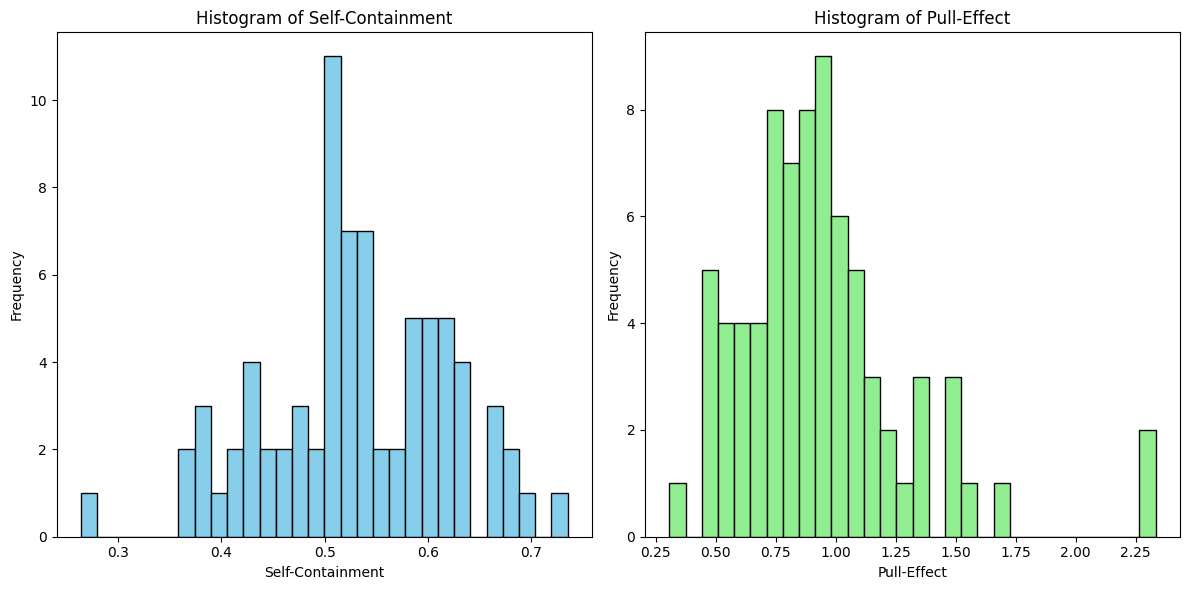

In [ ]:
# distribution of indices using histograms
# Plotting the histogram for 'Self-Containment'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_indices['Self-Containment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Self-Containment')
plt.xlabel('Self-Containment')
plt.ylabel('Frequency')

# Plotting the histogram for 'Pull-Effect'
plt.subplot(1, 2, 2)
plt.hist(df_indices['Pull-Effect'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Pull-Effect')
plt.xlabel('Pull-Effect')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-33-795746fa67d4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_indices['Self-Containment'], shade=True, color='skyblue')
<ipython-input-33-795746fa67d4>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_indices['Pull-Effect'], shade=True, color='lightgreen')


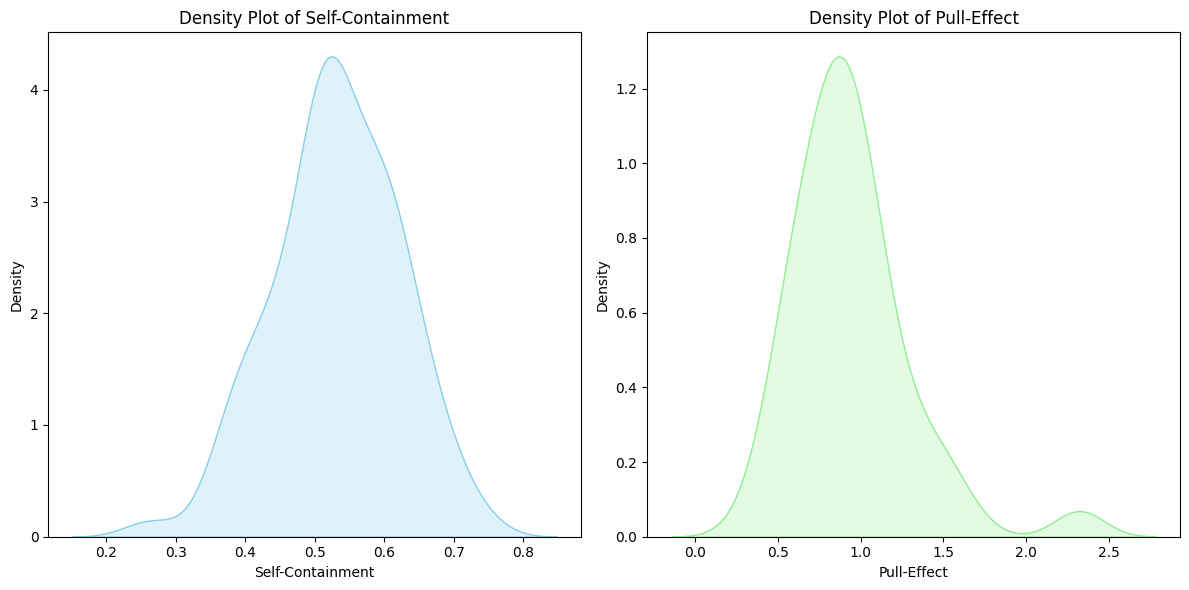

In [ ]:
# Plotting the density plot for 'Self-Containment'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(df_indices['Self-Containment'], shade=True, color='skyblue')
plt.title('Density Plot of Self-Containment')
plt.xlabel('Self-Containment')
plt.ylabel('Density')

# Plotting the density plot for 'Pull-Effect'
plt.subplot(1, 2, 2)
sns.kdeplot(df_indices['Pull-Effect'], shade=True, color='lightgreen')
plt.title('Density Plot of Pull-Effect')
plt.xlabel('Pull-Effect')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

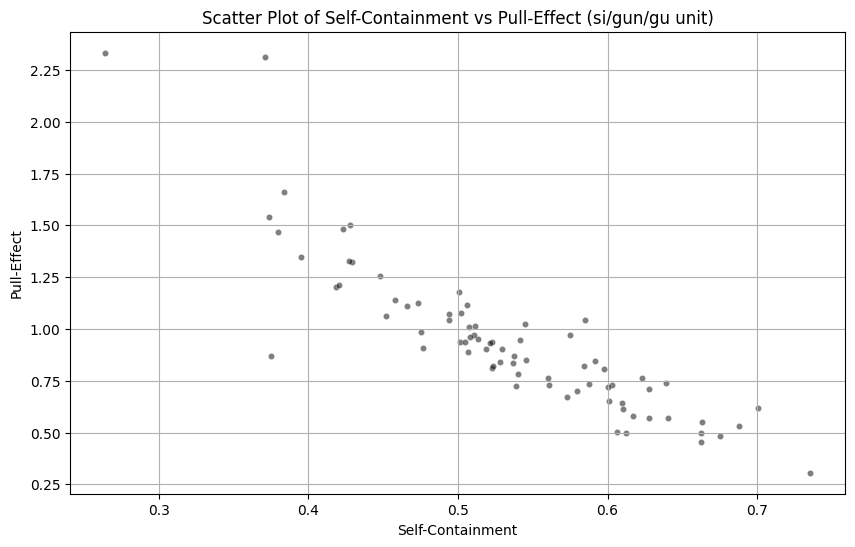

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_indices, x='Self-Containment', y='Pull-Effect', color='black', alpha=0.5, s=20)
plt.title('Scatter Plot of Self-Containment vs Pull-Effect (si/gun/gu unit)')
plt.xlabel('Self-Containment')
plt.ylabel('Pull-Effect')
plt.grid(True)
plt.show()

In [ ]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(df_indices['Self-Containment'], df_indices['Pull-Effect'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

Pearson correlation coefficient: -0.88
P-value: 2.06e-26


In [8]:
# Pull effect를 오름차순 정렬 후, 그래프 그려보기
# sort pull-effect in ascending order
df_indices = df_indices.sort_values(by='Pull-Effect', ascending=True)
# create the 'inv_rank' column
df_indices['inv_rank'] = range(1, len(df_indices) + 1)
df_indices.head()

,full_gu_name_orig,Self-Containment,Pull-Effect,inv_rank
38,경기도 평택시,0.735281,0.306054,1
9,경기도 김포시,0.662619,0.451939,2
37,경기도 파주시,0.675503,0.482652,3
12,경기도 부천시,0.662288,0.497669,4
41,경기도 화성시,0.612093,0.497798,5


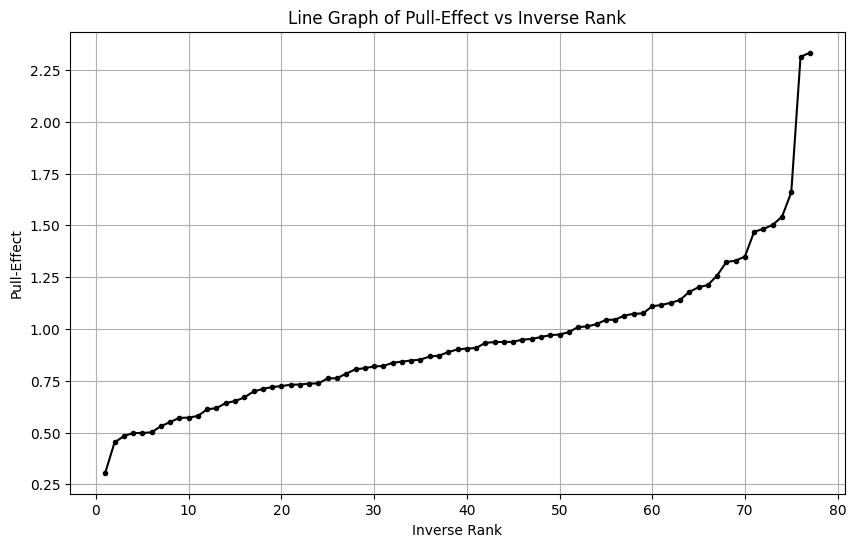

In [9]:
# draw the line graph having y-axis as Pull-Effect
# Plotting the line graph with adjusted marker size and color
plt.figure(figsize=(10, 6))
plt.plot(
    df_indices['inv_rank'],
    df_indices['Pull-Effect'],
    marker='o',
    linestyle='-',
    color='k',
    markerfacecolor='black',
    markeredgecolor='black',
    markersize=3
)
plt.title('Line Graph of Pull-Effect vs Inverse Rank')
plt.xlabel('Inverse Rank')
plt.ylabel('Pull-Effect')
plt.grid(True)
plt.show()

In [32]:
merged_df = df_indices

In [33]:
merged_df.head()

,full_gu_name_orig,Self-Containment,Pull-Effect,inv_rank,log_inv_rank,log_Pull_Effect,residuals,predicted
38,경기도 평택시,0.735281,0.306054,1,0.000000,-1.183994,0.154205,-1.338200
9,경기도 김포시,0.662619,0.451939,2,0.693147,-0.794209,0.295811,-1.090020
37,경기도 파주시,0.675503,0.482652,3,1.098612,-0.728460,0.216384,-0.944845
12,경기도 부천시,0.662288,0.497669,4,1.386294,-0.697821,0.144020,-0.841841
41,경기도 화성시,0.612093,0.497798,5,1.609438,-0.697560,0.064385,-0.761945


In [14]:
# Transform variables
merged_df.loc[:, 'log_inv_rank'] = np.log(merged_df['inv_rank'])
merged_df.loc[:, 'log_Pull_Effect'] = np.log(merged_df['Pull-Effect'])

In [34]:
# rank and residual plot
merged_df.loc[:, 'log_inv_rank'] = np.log(merged_df['inv_rank'])
X = sm.add_constant(merged_df['log_inv_rank'])
y = merged_df['log_Pull_Effect']

model = sm.OLS(y, X)
results = model.fit()

merged_df.loc[:, 'residuals'] = results.resid
merged_df.loc[:, 'predicted'] = results.predict(X)

In [36]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        log_Pull_Effect   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     391.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.69e-31
Time:                        06:19:33   Log-Likelihood:                 40.800
No. Observations:                  77   AIC:                            -77.60
Df Residuals:                      75   BIC:                            -72.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3382      0.063    -21.109   

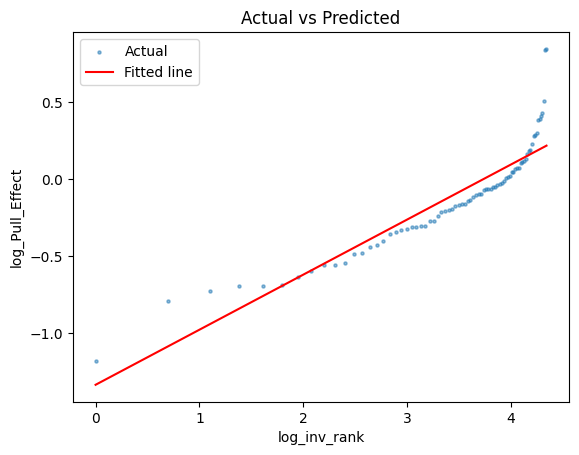

In [37]:
# line fit plot with rank and Pull-Effect
plt.scatter(merged_df['log_inv_rank'], merged_df['log_Pull_Effect'], s=5, alpha=0.5, label='Actual')
plt.plot(merged_df['log_inv_rank'], merged_df['predicted'], color='red', label='Fitted line')
plt.xlabel('log_inv_rank')
plt.ylabel('log_Pull_Effect')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

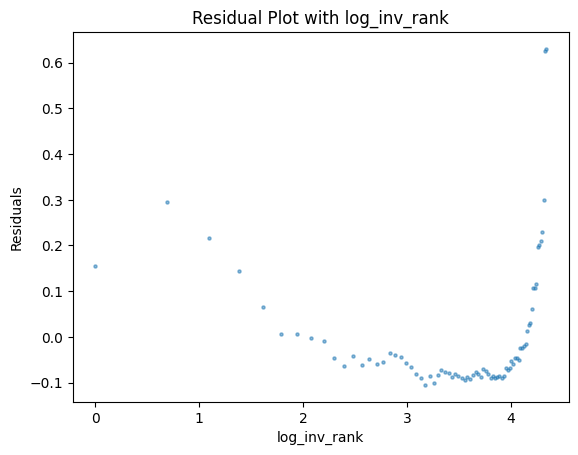

In [17]:
# Residual plot with rank and residuals
plt.scatter(merged_df['log_inv_rank'], merged_df['residuals'], s=5, alpha=0.5)
plt.xlabel('log_inv_rank')
plt.ylabel('Residuals')
plt.title('Residual Plot with log_inv_rank')
plt.show()

In [38]:
merged_df.head()

,full_gu_name_orig,Self-Containment,Pull-Effect,inv_rank,log_inv_rank,log_Pull_Effect,residuals,predicted
38,경기도 평택시,0.735281,0.306054,1,0.000000,-1.183994,0.154205,-1.338200
9,경기도 김포시,0.662619,0.451939,2,0.693147,-0.794209,0.295811,-1.090020
37,경기도 파주시,0.675503,0.482652,3,1.098612,-0.728460,0.216384,-0.944845
12,경기도 부천시,0.662288,0.497669,4,1.386294,-0.697821,0.144020,-0.841841
41,경기도 화성시,0.612093,0.497798,5,1.609438,-0.697560,0.064385,-0.761945


### De facto Population

In [18]:
pop = pd.read_csv('/content/drive/MyDrive/FMC_Data/LOCAL_PEOPLE_DONG_202303/LOCAL_PEOPLE_DONG_202303.csv', engine='python')

In [19]:
pop.columns = ['hour_category', 'ADMDONG_CD', 'All_pop', 'M0_9', 'M10_14', 'M15_19', 'M20_24', 'M25_29',
              'M30_34', 'M35_39', 'M40_44', 'M45_49', 'M50_54', 'M55_59', 'M60_64', 'M65_69', 'M70_up', 'F0_9', 'F10_14', 'F15_19', 'F20_24', 'F25_29',
              'F30_34', 'F35_39', 'F40_44', 'F45_49', 'F50_54', 'F55_59', 'F60_64', 'F65_69', 'F70_up', 'novalues']

In [20]:
pop.head()

,hour_category,ADMDONG_CD,All_pop,M0_9,M10_14,M15_19,M20_24,M25_29,M30_34,M35_39,...,F30_34,F35_39,F40_44,F45_49,F50_54,F55_59,F60_64,F65_69,F70_up,novalues
20230301,0,11500605,12152.9760,314.2590,99.2728,147.1853,125.0909,326.6752,600.0004,840.6125,...,761.3044,767.4585,391.5118,392.7704,377.4368,484.7090,509.1466,419.8514,1164.6325,NaN
20230301,0,11530750,26973.1386,1162.3654,452.8302,684.9993,578.3383,754.6888,901.7400,1170.0395,...,1137.1146,1210.0504,964.0278,1156.5304,962.3229,1291.0357,1142.7477,859.0726,2118.4307,NaN
20230301,0,11140650,9021.9829,307.1753,142.0813,156.1640,228.6131,390.8249,397.4347,403.5795,...,401.4260,437.3798,358.1555,333.1254,313.1381,425.0811,326.8493,198.8057,580.5874,NaN
20230301,0,11200645,26758.6325,1678.3430,465.1377,402.1320,400.6940,536.1799,709.9476,1474.4158,...,1053.7237,1718.0640,1432.6263,1255.1849,963.4359,1030.2344,956.1777,808.9140,1691.4118,NaN
20230301,0,11470610,4062.9669,132.5704,86.6805,108.5833,83.5500,119.4311,149.3410,205.6582,...,148.7245,169.2240,183.6700,162.8845,144.1637,178.7602,172.3166,128.2686,309.6982,NaN


In [21]:
# read indices_with_Engname data (right)
df_name = pd.read_csv('/content/drive/MyDrive/FMC_Data/ADMI_202303.csv')

In [26]:
# Combine 'sido' and 'gu' columns with a space in between
df_name['full_gu_name'] = df_name['SIDO_NM'] + ' ' + df_name['SGG_NM']
df_name.head()

,SIDO_NM,SGG_NM,ADMI_NM,ADMI_CD,FULL_NM,BASE_YM,full_gu_name
0,서울특별시,종로구,청운효자동,11110515,서울특별시 종로구 청운효자동,202303,서울특별시 종로구
1,서울특별시,종로구,사직동,11110530,서울특별시 종로구 사직동,202303,서울특별시 종로구
2,서울특별시,종로구,삼청동,11110540,서울특별시 종로구 삼청동,202303,서울특별시 종로구
3,서울특별시,종로구,부암동,11110550,서울특별시 종로구 부암동,202303,서울특별시 종로구
4,서울특별시,종로구,평창동,11110560,서울특별시 종로구 평창동,202303,서울특별시 종로구


In [27]:
# Merge gu name on the pop
selected_cols_to_merge = ['ADMI_CD', 'FULL_NM', 'full_gu_name', 'SIDO_NM', 'SGG_NM', 'ADMI_NM']
pop_merged = pd.merge(pop, df_name[selected_cols_to_merge], left_on = 'ADMDONG_CD', right_on = 'ADMI_CD', how = 'left')
pop_merged = pop_merged.drop(columns=['ADMI_CD'])
pop_merged = pop_merged.drop(columns=['novalues'])

In [28]:
pop_merged.head()

,hour_category,ADMDONG_CD,All_pop,M0_9,M10_14,M15_19,M20_24,M25_29,M30_34,M35_39,...,F50_54,F55_59,F60_64,F65_69,F70_up,FULL_NM,full_gu_name,SIDO_NM,SGG_NM,ADMI_NM
0,0,11500605,12152.9760,314.2590,99.2728,147.1853,125.0909,326.6752,600.0004,840.6125,...,377.4368,484.7090,509.1466,419.8514,1164.6325,서울특별시 강서구 가양3동,서울특별시 강서구,서울특별시,강서구,가양3동
1,0,11530750,26973.1386,1162.3654,452.8302,684.9993,578.3383,754.6888,901.7400,1170.0395,...,962.3229,1291.0357,1142.7477,859.0726,2118.4307,서울특별시 구로구 개봉2동,서울특별시 구로구,서울특별시,구로구,개봉2동
2,0,11140650,9021.9829,307.1753,142.0813,156.1640,228.6131,390.8249,397.4347,403.5795,...,313.1381,425.0811,326.8493,198.8057,580.5874,서울특별시 중구 신당5동,서울특별시 중구,서울특별시,중구,신당5동
3,0,11200645,26758.6325,1678.3430,465.1377,402.1320,400.6940,536.1799,709.9476,1474.4158,...,963.4359,1030.2344,956.1777,808.9140,1691.4118,서울특별시 성동구 옥수동,서울특별시 성동구,서울특별시,성동구,옥수동
4,0,11470610,4062.9669,132.5704,86.6805,108.5833,83.5500,119.4311,149.3410,205.6582,...,144.1637,178.7602,172.3166,128.2686,309.6982,서울특별시 양천구 신월6동,서울특별시 양천구,서울특별시,양천구,신월6동


In [30]:
df_avg_pop = pop_merged.groupby('full_gu_name')['All_pop'].mean().reset_index()

In [31]:
df_avg_pop.head()

,full_gu_name,All_pop
0,서울특별시 강남구,38433.499526
1,서울특별시 강동구,26998.855046
2,서울특별시 강북구,25050.673584
3,서울특별시 강서구,26783.011414
4,서울특별시 관악구,22157.784399


In [39]:
# population merge to merged_df
merged_df = pd.merge(merged_df, df_avg_pop, left_on = 'full_gu_name_orig', right_on = 'full_gu_name', how = 'left')
merged_df = merged_df.drop(columns=['full_gu_name'])
# Transform variables
merged_df.loc[:,'log_All_pop'] = np.log(merged_df['All_pop'])

In [40]:
# Replace drop any rows containing NaN
merged_df_Seoul = merged_df.dropna()

In [41]:
# Add a constant to the independent values
X = sm.add_constant(merged_df_Seoul['log_All_pop'])

# Create a model
model = sm.OLS(merged_df_Seoul['log_Pull_Effect'], X)

# Fit the model
results = model.fit()

# Get the beta coefficient
beta = results.params['log_All_pop']

print("The beta coefficient is", beta)

The beta coefficient is -0.36601484778984633


In [42]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        log_Pull_Effect   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.871
Date:                Thu, 10 Oct 2024   Prob (F-statistic):              0.104
Time:                        06:25:46   Log-Likelihood:                 5.7000
No. Observations:                  25   AIC:                            -7.400
Df Residuals:                      23   BIC:                            -4.962
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.7158      2.178      1.706      

<ipython-input-44-6882c321de25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_Seoul['residuals'] = results.resid


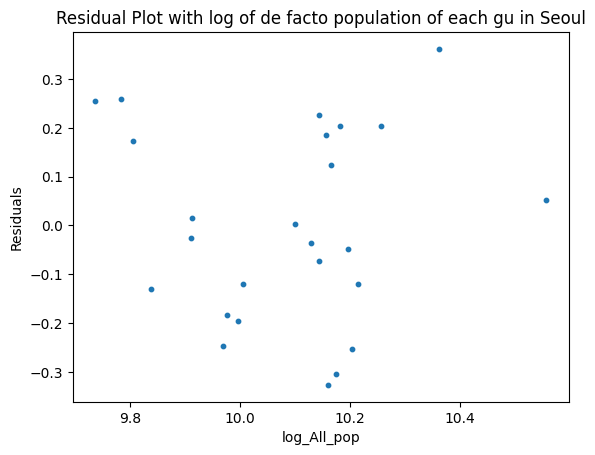

In [44]:
import matplotlib.pyplot as plt

# Calculate the residuals
merged_df_Seoul['residuals'] = results.resid

# Create a scatter plot
plt.scatter(merged_df_Seoul['log_All_pop'], merged_df_Seoul['residuals'], s=10)
plt.xlabel('log_All_pop')
plt.ylabel('Residuals')
plt.title('Residual Plot with log of de facto population of each gu in Seoul')
plt.show()

<ipython-input-45-183d48b0c578>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_Seoul['predicted'] = results.predict(X)


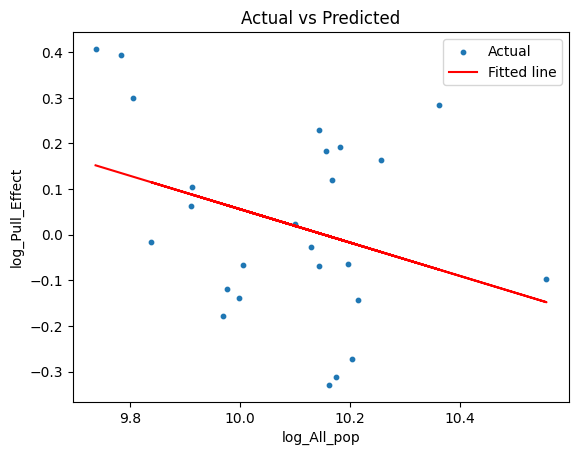

In [45]:
# Calculate predicted values
merged_df_Seoul['predicted'] = results.predict(X)

plt.scatter(merged_df_Seoul['log_All_pop'], merged_df_Seoul['log_Pull_Effect'], s=10, label='Actual')
plt.plot(merged_df_Seoul['log_All_pop'], merged_df_Seoul['predicted'], color='red', label='Fitted line')
plt.xlabel('log_All_pop')
plt.ylabel('log_Pull_Effect')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()